In [1]:
import gym
import environment.qmaze

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#tf.enable_eager_execution()

import trfl
import numpy as np
import random

/home/jonas/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


/home/jonas/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


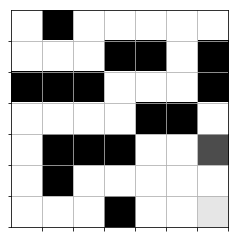

In [21]:
env = gym.make('QMaze-v0', rewards = [1.0, -0.75, -0.04,-0.04])
import gym.core
class EWrap(gym.core.ObservationWrapper):
    def observation(self, observation):
        return self.env.state[0] * 7 + self.env.state[1]
    
env = EWrap(env)


env.reset()
env.render()

In [23]:
gamma = 0.95
epsilon = 0.1
lr = 0.2
tep_max = 10000

Q = np.random.rand(49,4)

num_episodes = 1000


def choose_action(state):
    if random.random() < epsilon:
        return random.randrange(4)
    
    return np.argmax(Q[state, :], 0)



for _ in range(num_episodes):
    s = env.reset()
    done = False
    tep = 0
    
    while not done and tep < tep_max:
        a = choose_action(s)
        snew, reward, done, _ = env.step(a)
        
        if done:
            Q[s, a] += lr * (reward - Q[s, a])
            
        else:
            Q[s, a] += lr * (reward + gamma * np.max(Q[snew, :], 0) - Q[s, a])
                             
        s = snew
        tep += 1
        
Qtrue = Q.reshape((7,7,-1))

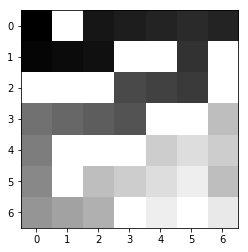

[[1.  0.  1.  1.  0.5 1.  1. ]
 [1.  1.  1.  0.  0.  1.  0. ]
 [0.  0.  0.  1.  1.  1.  0. ]
 [1.  1.  1.  1.  0.  0.  1. ]
 [1.  0.  0.  0.  1.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  0.  1.  1.  1. ]]


In [24]:
# Print value function
V = np.max(Q, 1).reshape((7,7))

# Remove maze
min_v = np.min(V)
max_v = np.max(V)
V = (V - min_v) / (max_v - min_v)
V[env.unwrapped.maze == 0] = 1

img = plt.imshow(V, interpolation='none', cmap='gray')
plt.show()

print(env.unwrapped.maze)

In [5]:
import deepq.baselines as deepq

# tf.reset_default_graph()
'''env = gym.make('QMaze-v0', rewards = [1.0, -0.75, -0.04,-0.04])
act, policy = deepq.learn(
    env,
    network='mlp',
    lr=1e-3,
    total_timesteps=100000,
    buffer_size=5000,
    gamma = 0.95,
    exploration_fraction=0.1,
    exploration_final_eps=0.01,
    print_freq=10
)'''

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216

Logging to /tmp/openai-2019-02-19-10-30-57-941204


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


"env = gym.make('QMaze-v0', rewards = [1.0, -0.75, -0.04,-0.04])\nact, policy = deepq.learn(\n    env,\n    network='mlp',\n    lr=1e-3,\n    total_timesteps=100000,\n    buffer_size=5000,\n    gamma = 0.95,\n    exploration_fraction=0.1,\n    exploration_final_eps=0.01,\n    print_freq=10\n)"

In [9]:
from common import make_agent
import experiments.qmaze_dqn

agent = make_agent('deepq-qmaze')

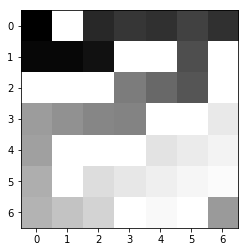

[[0.         1.         0.1616132  0.21225877 0.19372727 0.25508663
  0.19045824]
 [0.02779138 0.02896506 0.06905601 1.         1.         0.30829003
  1.        ]
 [1.         1.         1.         0.4867548  0.4072466  0.33343947
  1.        ]
 [0.6103115  0.5702099  0.5251529  0.5133645  1.         1.
  0.91327804]
 [0.62630105 1.         1.         1.         0.8921159  0.92121226
  0.9548974 ]
 [0.68327457 1.         0.8663403  0.90537554 0.9372049  0.96483254
  0.98277587]
 [0.6999367  0.7642203  0.83193815 1.         0.9742495  1.
  0.60217893]]


In [12]:
env = gym.make('QMaze-v0', rewards = [1.0, 0.0, 0.0, 0.0]) #rewards = [1.0, -0.75, -0.04,-0.04])
Q = np.zeros((7,7,4), dtype = np.float32)
for y in range(7):
    for x in range(7):
        observation = env.reset((x,y,))
        Q[x,y,:] = agent.q(observation)
            
V = np.max(Q, 2)

min_v = np.min(V)
max_v = np.max(V)
V = (V - min_v) / (max_v - min_v)

# Remove maze
V[env._maze == 0] = 1

img = plt.imshow(V, interpolation='none', cmap='gray')
plt.show()

print(V)

In [14]:
correctness = np.mean(np.argmax(Q, 2) == np.argmax(Qtrue, 2))
print(correctness)

0.7755102040816326
